In [1]:
import imutils
import cv2
from skimage.metrics import structural_similarity
from PIL import Image

In [2]:
# GETTING THE ORIGINAL AND TEMPERED IMAGE
original = Image.open("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\Pancard\\PANCARD.jpg")
temperd = Image.open("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\Pancard\\Pancard2.jpg")

In [3]:
# THE FILE FORMAT
print("The original image format is :", original.format)
print("The temperd image format is :", temperd.format)

The original image format is : JPEG
The temperd image format is : JPEG


In [4]:
# IMAGE SIZE, IN PIXELS. THE SIZE IS GIVEN A 2 TUPLE (WIDTH, HEIGHT)
print("The original image size is :", original.size) 
print("The temperd image size is :", original.size)

The original image size is : (498, 313)
The temperd image size is : (498, 313)


In [5]:
# RESIZING AND SAVING THE IMAGES
original = original.resize((250, 160))
print(original.size)
original.save("pancard_tempring//images//original.png")

temperd = temperd.resize((250, 160))
print(temperd.size)
temperd.save("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\pancard_tempring\\images\\temperd.png")

(250, 160)
(250, 160)


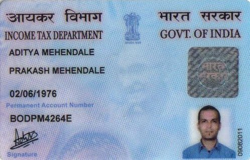

In [6]:
# DISPLAYING THE ORIGINAL IMAGE
original



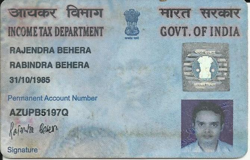

In [7]:
# DISPLAYING THE TEMPERD IMAGE
temperd

In [8]:
# LOADING THE TWO INPUT IMAGES
original = cv2.imread("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\pancard_tempring\\images\\original.png")
temperd = cv2.imread("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\pancard_tempring\\images\\temperd.png")

In [9]:
# CONVERTING THE IMAGES TO THE GRAY SCALE
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
temperd_gray = cv2.cvtColor(temperd, cv2.COLOR_BGR2GRAY)

In [10]:
# COMPUTE THE STRUCTUTRAL SIMILARITY INDEX (SSIM) BETWEEN TWO IMAGES ENSURING THAT THE DIFFERENCE IMAGE IS RETURNED
(score, diff) = structural_similarity(original_gray, temperd_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM Score is : {}".format(score*100))
if score*100 >= 80:
    print ("The given pan card is original")
else:
    print("The given pan card is tampered")

SSIM Score is : 24.774917655780275
The given pan card is tampered


In [11]:
# CALCULATING THE THRESHOLD AND CONTOUURS
thresh = cv2.threshold(diff, 0, 225, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [12]:
# LOOP OVER THE CONTOURS
for c in cnts:
  # APPLYING CONTOURS ON IMAGE
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 225), 2)
  cv2.rectangle(temperd, (x, y), (x + w, y + h), (0, 0, 225), 2)

Original Format Image


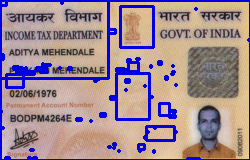

In [13]:
# DISPLAY ORIGINAL IMAGE WITH CONTOUR
print("Original Format Image")
original_contour = Image.fromarray(original)
original_contour.save("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\pancard_tempring\\images\\original_contour.png")
original_contour

Temperd Format Image


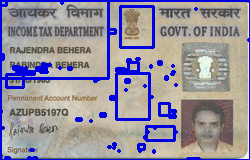

In [14]:
# DISPLAY TEMPERD IMAGE WITH CONTOUR
print("Temperd Format Image")
temperd_contour = Image.fromarray(temperd)
temperd_contour.save("pancard_tempring//images//temperd_contour.png")
temperd_contour

Difference Image


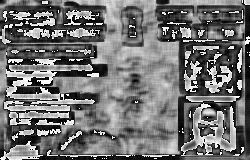

In [15]:
# DISPLAY DIFFERENCE IMAGE WITH BLACK
print("Difference Image")
difference_image = Image.fromarray(diff)
difference_image.save("pancard_tempring//images//difference_image.png")
difference_image

Threshold Image


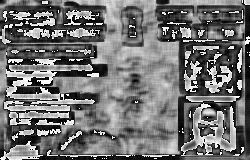

In [16]:
# DISPLAY THRESHOLD IMAGE WITH WHITE
print("Threshold Image")
threshold_image = Image.fromarray(diff)
threshold_image.save("C:\\Users\\mooni\\.vscode\\Fraud Pan Card Detection\\pancard_tempring\\images\\threshold_image.png")
threshold_image